# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

В номерах 7,12 рассмотрено очень много случаев, потому что задание выполнялось до того, как в чате было объявлено, что все точки необходимо считать различными.
Извините, что вам придется читать такой огромный код :)

## Импорт библиотек

In [81]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [82]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [83]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100    
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

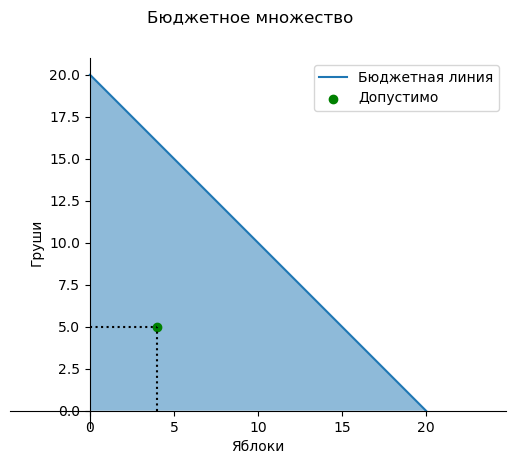

In [84]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100   
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [85]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [86]:
df = pd.read_excel("/Users/amirzoyeva/Desktop/практикум/model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [87]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price']) 
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [88]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [89]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [90]:
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

### Случай двух товаров

In [91]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))

[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

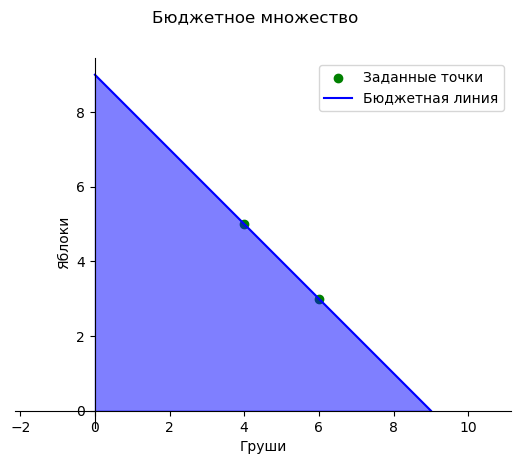

In [92]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [93]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [94]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений: 

# Решение:

Очевидно, что задача не меняется, если обобщить ее на на n товаров. 
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + ... + p_n a_{1,n} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} + ... + p_n a_{2,n} = 1\\
... \\
p_1 a_{n,1} + p_2 a_{n,2} + ... + p_n a_{n,n} = 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n}\\
a_{21} & a_{22} & \ldots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \ldots & a_{nn}
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        \vdots \\
        p_n
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        \vdots \\
        1
\end{pmatrix}
$$

Решение: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        \vdots \\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n}\\
a_{21} & a_{22} & \ldots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \ldots & a_{nn}
\end{pmatrix}
^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        \vdots \\
        1
\end{pmatrix}
$$

In [95]:
def get_goods_parameters(list_of_points: np.array):
    
    ones = np.ones([len(list_of_points),1])

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

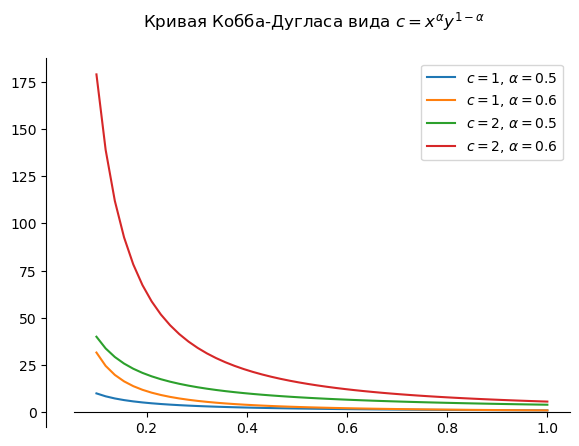

In [96]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

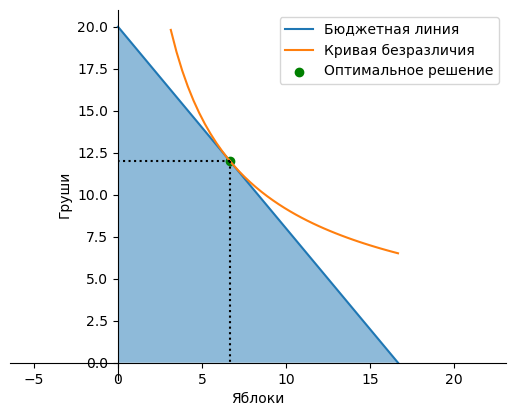

In [97]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [98]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

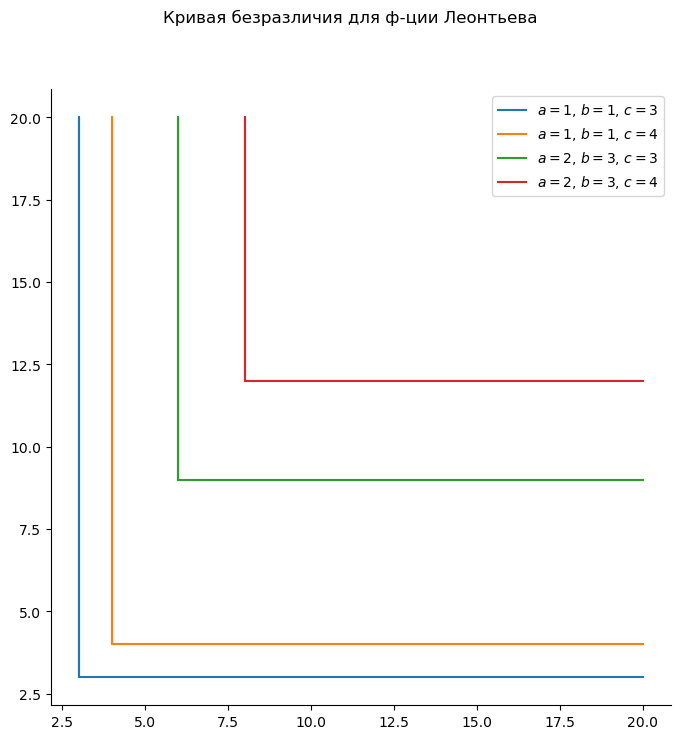

In [99]:
def plot_Leontev(a_values, b_values, c_values):
    fig, ax = plt.subplots(figsize = (8, 8))
    fig.suptitle("Кривая безразличия для ф-ции Леонтьева")
    for i in range(min(len(a_values), len(b_values))):
        for c in c_values:    
            x_point = [a_values[i] * c] * 50 + [x for x in np.linspace(a_values[i] * c, 20, 50)]
            y_point = [y for y in np.linspace(b_values[i] * c, 20, 50)] + [b_values[i] * c] * 50
        
            ax.plot(x_point, y_point, label=f"$a = {a_values[i]}$, $b = {b_values[i]}$, $c = {c}$")
 
     
     
    ax.spines['right'].set_visible(False) 
    ax.spines['top'].set_visible(False) 
    ax.legend() 

a_values = [1, 2]
b_values = [1, 3]
c_values = [3, 4]
plot_Leontev(a_values, b_values, c_values)


### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

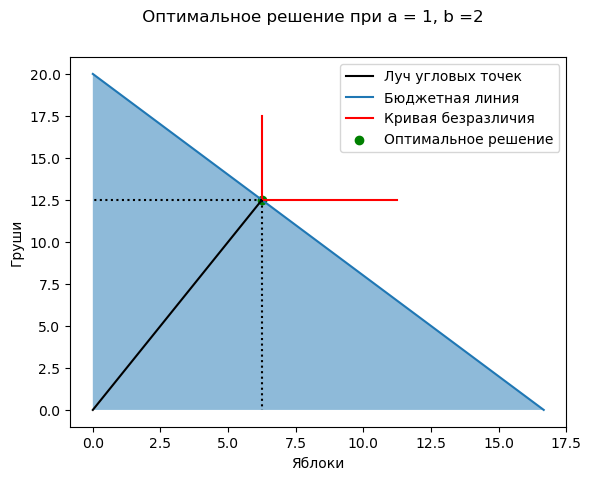

In [100]:

def plot_budget_Leontev(g1, g2, budget, a, b):  
    fig, ax = plt.subplots()   
    fig.suptitle(" Оптимальное решение при a = 1, b =2")
    '''
    Угловые точки всех кривых безразличия лежат на луче, выходящем из начала координат под углом,
    тангенс которого равен a/b;
    Уравнение луча : y = (a/b)*x или x= (b/a)y Подставим это выражение в уравнение бюджетного ограничения и получим 
    формулы для вычисления координат оптимальной точки
    '''
    x_solution = a*budget/(a*g1.price+b*g2.price)
    y_solution = b*budget/(a*g1.price+b*g2.price)
    ax.plot([0,x_solution],[0,y_solution], color = 'k', label = "Луч угловых точек" )
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    ax.plot([x_solution, x_solution], [y_solution, y_solution+5], color = 'r')  
    ax.plot([x_solution, x_solution+5], [y_solution, y_solution], label=f"Кривая безразличия" , color = 'r')
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:') 
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)   
    ax.set_ylabel(g2.name)

    ax.legend()
    plt.show()
g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [101]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [102]:
class Goodfree():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [103]:
def budget_test_free(g1: Goodfree, g2: Goodfree, budget, x1=0, x2=0):
    # Бюджетное ограничение для нашей модели с фиксированным бесплатным объемом для каждого блага
    result = g1.price*max(x1-g1.free,0) + max(x2-g2.free,0)*g2.price 
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1


g1 = Goodfree("Яблоки", 10, 1)
g2 = Goodfree("Груши", 10, 1)
budget = 100
print(budget_test_free(g1, g2, budget, 5, 6))
print(budget_test_free(g1, g2, budget, 6, 6))
print(budget_test_free(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

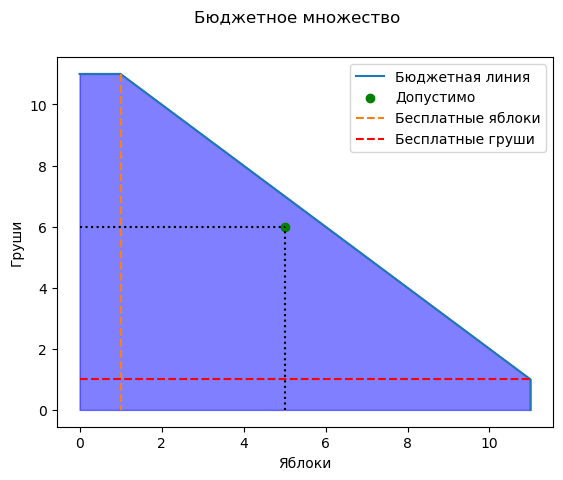

In [104]:
def plot_budget_free(g1: Goodfree, g2: Goodfree, budget, x, y):
    x_border = [0,g1.free, (budget/g1.price) + g1.free, (budget/g1.price) + g1.free]
    y_border = [(budget/g2.price) + g2.free, (budget/g2.price) + g2.free,g2.free, 0]
    fig, ax = plt.subplots()
    fig.suptitle("Бюджетное множество")
    
    point_status = budget_test_free(g1, g2, budget, x, y)
    
   
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    ax.plot(x_border, y_border, label="Бюджетная линия")
    ax.fill_between(x_border, y_border, np.zeros_like(x_border), alpha=0.5, color="blue")
    ax.scatter(x, y, color = point_color, label = point_label)
    ax.plot([g1.free,g1.free],[(budget/g2.price) + g2.free, 0],'--', label = "Бесплатные яблоки")
    ax.plot([0,(budget/g1.price) + g1.free],[g2.free, g2.free],'--r', label = "Бесплатные груши")
    ax.plot([x, x], [0, y], 'k:') 
    ax.plot([0, x], [y, y], 'k:') 
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.legend()
    plt.show()

g1 = Goodfree("Яблоки", 10, 1)
g2 = Goodfree("Груши", 10, 1)
budget = 100
plot_budget_free(g1, g2, budget, 5, 6)

## Интерактивное представление

In [105]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Goodfree("Яблоки", p1, f1)
    g2 = Goodfree("Груши", p2, f2)
    plot_budget_free(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [106]:
#Открываем файл
data = pd.read_excel("/Users/amirzoyeva/Desktop/практикум/model2_data.xlsx") 
data 

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant
0,Яблоки,10,2,Груши,11,2,50,12,10
1,Апельсины,7,3,Мандарины,8,2,49,5,4
2,Клубника,8,1,Малина,10,2,80,6,6
3,Виноград,14,3,Яблоки,11,1,48,10,1
4,Арбуз,15,2,Дыня,15,1,45,3,3
5,Апельсины,9,1,Мандарины,11,3,30,4,5
6,Клубника,11,2,Малина,12,3,47,3,6
7,Арбуз,11,2,Дыня,10,3,48,4,5
8,Виноград,9,1,Яблоки,8,3,39,8,6
9,Кофе,6,3,Чай,4,2,34,6,6


In [107]:
result=[]
for index, row in data.iterrows():
    g1 = Goodfree(row['G1_name'], row['G1_price'], row['G1_free']) 
    g2 = Goodfree(row['G2_name'], row['G2_price'], row['G2_free'])
    result.append(budget_test_free(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))
data["Result"] = result
data

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
0,Яблоки,10,2,Груши,11,2,50,12,10,-1
1,Апельсины,7,3,Мандарины,8,2,49,5,4,1
2,Клубника,8,1,Малина,10,2,80,6,6,0
3,Виноград,14,3,Яблоки,11,1,48,10,1,-1
4,Арбуз,15,2,Дыня,15,1,45,3,3,0
5,Апельсины,9,1,Мандарины,11,3,30,4,5,-1
6,Клубника,11,2,Малина,12,3,47,3,6,0
7,Арбуз,11,2,Дыня,10,3,48,4,5,1
8,Виноград,9,1,Яблоки,8,3,39,8,6,-1
9,Кофе,6,3,Чай,4,2,34,6,6,0


In [108]:
data_super = data[data["Result"] >= 0] 
data_super

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
1,Апельсины,7,3,Мандарины,8,2,49,5,4,1
2,Клубника,8,1,Малина,10,2,80,6,6,0
4,Арбуз,15,2,Дыня,15,1,45,3,3,0
6,Клубника,11,2,Малина,12,3,47,3,6,0
7,Арбуз,11,2,Дыня,10,3,48,4,5,1
9,Кофе,6,3,Чай,4,2,34,6,6,0
10,Мармелад,12,2,Шоколад,10,2,90,8,3,1


In [109]:
data_super = data_super.sort_values(by = 'G1_free')
data_super

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
2,Клубника,8,1,Малина,10,2,80,6,6,0
4,Арбуз,15,2,Дыня,15,1,45,3,3,0
6,Клубника,11,2,Малина,12,3,47,3,6,0
7,Арбуз,11,2,Дыня,10,3,48,4,5,1
10,Мармелад,12,2,Шоколад,10,2,90,8,3,1
1,Апельсины,7,3,Мандарины,8,2,49,5,4,1
9,Кофе,6,3,Чай,4,2,34,6,6,0


In [110]:
data_super.to_excel("model2_result.xlsx")

## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

Алгоритм:
1. Остортируем точки по возрастанию координаты x
2. Далее будем поочередно соединять точки друг с другом. Если в какой-то паре коэффициент k в уравнении прямой больше 0, то сразу понятно, что невозможно построить такое бюджетное ограничение, так как тогда как минимум одна точка будет лежать выше.
3. Еще одним критерием является невозрастание углов наклона прямой относительно Ox.  В коде k=0 у прямых параллельных Ox, k=-10000 - у парааллельных Oy.
Данные критерии проверяются в функции is_points_okay.
Далее, если провести бюджетную линию возможно, то необходимо построить график в зависимости от расположения точек
Для этого провожу прямую параллельную оси Ox и отдельно так же для оси Oy, соединяю точки, которые лежат посередине  и нахожу точки пересечения этой прямой с двумя параллельными. Так будет построена бюджетная линия

In [111]:
class Point:#в конце я поняла, что этот класс только усложнил мне жизнь, но возвращаться было уже поздно...
    def __init__(self, x = 0, y = 0):
        self.x_coord = x
        self.y_coord = y

Параметры существуют:
free1 = 2.0,free2 = 2.0, price1 =[0.16666667], price2 = [0.08333333]


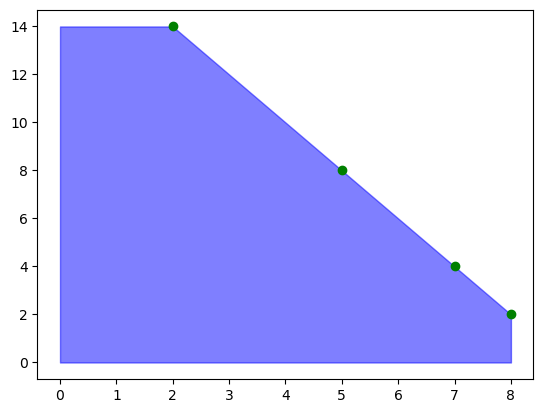

In [112]:
def linear_func_help(x1, y1, x2, y2):
    if(x1-x2 == 0):
        return x1
    elif(y1-y2==0):
        return y1
    else:
        k = (y1-y2)/(x1-x2)
        b = y1 - k*x1
        return k,b
    
def linear_func(x1, y1, x2, y2):
    if(x1-x2 == 0):
        k = -10000
        b = 0;
        return k,b
    elif(y1-y2==0):
        k = 0
        b = y1
        return k, b
    else:
        k = (y1-y2)/(x1-x2)
        b = y1 - k*x1
        return k,b
    
    
def solve_lin (k1,b1,k2,b2):
    x = (b2-b1)/(k1-k2)
    y = k1*x+ b1
    return x,y

def find_prices(list_of_freepoints: np.array):
    ones = np.ones([len(list_of_freepoints),1])
    if np.linalg.det(list_of_freepoints) != 0:
        solution = np.linalg.inv(list_of_freepoints) @ ones
    else:
        return None
    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution
def is_points_equal(A1:Point, A2:Point):
    if(A1.x_coord == A2.x_coord and A1.y_coord == A2.y_coord):
        return True

def is_points_okay(A1:Point,A2:Point,A3:Point,A4:Point):
    list_of_points = [A1, A2, A3, A4]
    coordinats_x = [A1.x_coord, A2.x_coord, A3.x_coord, A4.x_coord]
    coordinats_y = [A1.y_coord, A2.y_coord, A3.y_coord, A4.y_coord]
    coordinats_x_copy = [A1.x_coord, A2.x_coord, A3.x_coord, A4.x_coord]
    coordinats_x.sort()
    is_already=[False, False, False, False]
    poryadok_soedin = []
    for j in range(len(coordinats_x)):
        for i in range(len(list_of_points)):
             if list_of_points[i].x_coord == coordinats_x[j] and is_already[i]==False:
                poryadok_soedin.append(list_of_points[i])
                is_already[i]==True
                break

    k1, b1 = linear_func(poryadok_soedin[0].x_coord, poryadok_soedin[0].y_coord, poryadok_soedin[1].x_coord, poryadok_soedin[1].y_coord)
    k2, b2 = linear_func(poryadok_soedin[1].x_coord, poryadok_soedin[1].y_coord, poryadok_soedin[2].x_coord, poryadok_soedin[2].y_coord)
    k3, b3 = linear_func(poryadok_soedin[2].x_coord, poryadok_soedin[2].y_coord, poryadok_soedin[3].x_coord, poryadok_soedin[3].y_coord)
    coefs = [k1,k2,k3]
    for i in range (3):
        if(coefs[i]>0):
            return False;
        else:
            if(i != len(coefs) - 1):
                if(coefs[i]<coefs[i+1]):
                    return False;
                else:
                    continue;
    return True;
    
def plz_grafik(A1:Point,A2:Point,A3:Point,A4:Point):
    list_of_points = [A1, A2, A3, A4]
    coordinats_x = [A1.x_coord, A2.x_coord, A3.x_coord, A4.x_coord]
    coordinats_y = [A1.y_coord, A2.y_coord, A3.y_coord, A4.y_coord]
    coordinats_x_copy = [A1.x_coord, A2.x_coord, A3.x_coord, A4.x_coord]
    if(len(set(coordinats_y)) == 1 ): #все точки на одной прямой, параллельной Ox
        print("Бесконечное множество решений, выведу произвольное")
        free1 = max(coordinats_x)
        free2 = 2
        A5 = Point(free1+5, 2)
        for i in range(len(list_of_points)):
            if(list_of_points[i].x_coord==free1):
                a=list_of_points[i].y_coord
        x_values=[0, free1,A5.x_coord, A5.x_coord]
        y_values=[a, a ,A5.y_coord, 0]
        fig, ax = plt.subplots()
        ax.fill_between(x_values, y_values, np.zeros_like(x_values), alpha=0.5, color="blue")
        ax.scatter(coordinats_x_copy, coordinats_y, label="Заданные точки", color="green")
        list_of_freepoints = [
            [free1 - free1,a-free2],
            [A5.x_coord - free1,A5.y_coord-free2],
        ]
        price1, price2 = find_prices(list_of_freepoints)
        print("Параметры существуют:")
        print(f"free1 = {free1},free2 = {free2}, price1 ={price1}, price2 = {price2}")
        return
    if(len(set(coordinats_x)) == 1):#все точки на одной прямой, параллельной OY
        print("Бесконечное множество решений, выведу произвольное") 
        free1 = 2
        free2 = max(coordinats_y)
        A5 = Point(free1, free2+5)
        for i in range(len(list_of_points)):
            if(list_of_points[i].y_coord==free2):
                a=list_of_points[i].x_coord
        x_values=[0, free1,a ,a ]
        y_values=[A5.y_coord, A5.y_coord ,free2, 0]
        fig, ax = plt.subplots()
        ax.fill_between(x_values, y_values, np.zeros_like(x_values), alpha=0.5, color="blue")
        ax.scatter(coordinats_x_copy, coordinats_y, label="Заданные точки", color="green")
        list_of_freepoints = [
            [A5.x_coord - free1,A5.y_coord-free2],
            [a - free1,free2-free2],
        ]
        
        price1, price2 = find_prices(list_of_freepoints)
        print("Параметры существуют:")
        print(f"free1 = {free1},free2 = {free2}, price1 ={price1}, price2 = {price2}")
        return
    coordinats_x.sort()
    poryadok_soedin = []
    for j in range(len(coordinats_x)):
        for i in range(len(list_of_points)):
             if list_of_points[i].x_coord == coordinats_x[j]:
                poryadok_soedin.append(list_of_points[i])

    k1, b1 = linear_func(poryadok_soedin[0].x_coord, poryadok_soedin[0].y_coord, poryadok_soedin[1].x_coord, poryadok_soedin[1].y_coord)
    k2, b2 = linear_func(poryadok_soedin[1].x_coord, poryadok_soedin[1].y_coord, poryadok_soedin[2].x_coord, poryadok_soedin[2].y_coord)
    k3, b3 = linear_func(poryadok_soedin[2].x_coord, poryadok_soedin[2].y_coord, poryadok_soedin[3].x_coord, poryadok_soedin[3].y_coord)
    coefs = [k1,k2,k3]
    if(coefs.count(0)==coefs.count(-10000)==0): #cлучай, когда все точки на разных прямых
            x1 = linear_func_help(poryadok_soedin[3].x_coord, poryadok_soedin[3].y_coord,poryadok_soedin[3].x_coord, 0)
            y1 = linear_func_help(poryadok_soedin[0].x_coord, poryadok_soedin[0].y_coord, poryadok_soedin[0].x_coord+1, poryadok_soedin[0].y_coord)
            x_new = (y1-b2)/k2 #(x_new, y1)
            y_new = k2*x1+b2 #(x1, y_new)
            free1 = x_new
            free2 = y_new
            list_of_freepoints = [
             [poryadok_soedin[1].x_coord - free1,poryadok_soedin[1].y_coord-free2],
             [poryadok_soedin[2].x_coord - free1,poryadok_soedin[2].y_coord-free2],
            ]
            price1, price2 = find_prices(list_of_freepoints)
            print("Параметры существуют:")
            print(f"free1 = {free1},free2 = {free2}, price1 ={price1}, price2 = {price2}")
            x_values = [0,x_new, x1, x1]
            y_values = [y1, y1, y_new, 0]
            fig, ax = plt.subplots()
            ax.fill_between(x_values, y_values, np.zeros_like(x_values), alpha=0.5, color="blue")
            ax.scatter(coordinats_x_copy, coordinats_y, label="Заданные точки", color="green")
    else:
        if (k1 == 0 and k2!=0 and k3 != -10000):#две точки на одной прямой, параллельной Ox, остальные произвольно 
            x1 = linear_func_help(poryadok_soedin[3].x_coord, poryadok_soedin[3].y_coord,poryadok_soedin[3].x_coord, 0)
            y1 = linear_func_help(poryadok_soedin[0].x_coord, poryadok_soedin[0].y_coord, poryadok_soedin[0].x_coord+1, poryadok_soedin[0].y_coord)
            x_new = (y1-b2)/k2 #(x_new, y1)
            y_new = k2*x1+b2 #(x1, y_new)
            x_values = [0,x_new, x1, x1]
            y_values = [y1, y1, y_new, 0]
            free1 = x_new
            free2 = y_new
            list_of_freepoints = [
             [x_new - free1,y1-free2],
             [x1 - free1,y_new-free2],
            ]
            price1, price2 =find_prices(list_of_freepoints)
            print("Параметры существуют:")
            print(f"free1 = {free1},free2 = {free2}, price1 ={price1}, price2 = {price2}")
            fig, ax = plt.subplots()
            ax.fill_between(x_values, y_values, np.zeros_like(x_values), alpha=0.5, color="blue")
            ax.scatter(coordinats_x_copy, coordinats_y, label="Заданные точки", color="green")
        elif (k1==k2 ==0 and k3!=-1000 ): #три точки на одной прямой, параллельной Ox, остальные произвольно 
            x1 = linear_func_help(poryadok_soedin[3].x_coord, poryadok_soedin[3].y_coord,poryadok_soedin[3].x_coord, 0)
            y_new = k3*x1+b3
            x_values = [0,poryadok_soedin[2].x_coord, x1, x1]
            y_values = [poryadok_soedin[2].y_coord, poryadok_soedin[2].y_coord, y_new, 0]
            free1 = poryadok_soedin[2].x_coord
            free2 = y_new
            list_of_freepoints = [
             [poryadok_soedin[2].x_coord - free1,poryadok_soedin[2].y_coord-free2],
             [x1 - free1,y_new-free2],
            ]
            price1, price2 = find_prices(list_of_freepoints)
            print("Параметры существуют:")
            print(f"free1 = {free1},free2 = {free2}, price1 ={price1}, price2 = {price2}")
            fig, ax = plt.subplots()
            ax.fill_between(x_values, y_values, np.zeros_like(x_values), alpha=0.5, color="blue")
            ax.scatter(coordinats_x_copy, coordinats_y, label="Заданные точки", color="green")
        elif(k3 == -10000 and k1 == 0):#две точки на одной прямой, параллельной Ox, две точки на прямой, параллельной Щy 
            x_values = [0,poryadok_soedin[1].x_coord, poryadok_soedin[2].x_coord, poryadok_soedin[3].x_coord]
            y_values = [poryadok_soedin[0].y_coord, poryadok_soedin[1].y_coord,max(poryadok_soedin[3].y_coord,poryadok_soedin[2].y_coord),max(poryadok_soedin[3].y_coord,poryadok_soedin[2].y_coord) ]
            free1 = poryadok_soedin[1].x_coord
            free2 = poryadok_soedin[2].y_coord
            list_of_freepoints = [
             [poryadok_soedin[1].x_coord - free1,poryadok_soedin[1].y_coord-free2],
             [poryadok_soedin[2].x_coord - free1,poryadok_soedin[2].y_coord-free2],
            ]
            price1, price2 = find_prices(list_of_freepoints)
            print("Параметры существуют:")
            print(f"free1 = {free1},free2 = {free2}, price1 ={price1}, price2 = {price2}")
            fig, ax = plt.subplots()
            ax.fill_between(x_values, y_values, np.zeros_like(x_values), alpha=0.5, color="blue")
            ax.scatter(coordinats_x_copy, coordinats_y, label="Заданные точки", color="green")
        elif(k2 == -10000 and k3 ==-10000):#три точки на одной прямой, параллельной Oy  
            y1= linear_func_help(poryadok_soedin[0].x_coord, poryadok_soedin[0].y_coord, poryadok_soedin[0].x_coord+1, poryadok_soedin[0].y_coord)
            x_new = (y1-b1)/k1 #(x_new, y1)
            free1 = poryadok_soedin[0].x_coord
            free2 = poryadok_soedin[1].y_coord
            list_of_freepoints = [
             [poryadok_soedin[0].x_coord - free1,poryadok_soedin[0].y_coord-free2],
             [poryadok_soedin[1].x_coord - free1,poryadok_soedin[1].y_coord-free2],
            ]
            price1, price2 = find_prices(list_of_freepoints)
            print("Параметры существуют:")
            print(f"free1 = {free1},free2 = {free2}, price1 ={price1}, price2 = {price2}")
            x_values = [0,x_new,poryadok_soedin[2].x_coord, poryadok_soedin[3].x_coord]
            y_values = [y1, y1,max(poryadok_soedin[1].y_coord, poryadok_soedin[2].y_coord,poryadok_soedin[3].y_coord), 0]
            fig, ax = plt.subplots()
            ax.fill_between(x_values, y_values, np.zeros_like(x_values), alpha=0.5, color="blue")
            ax.scatter(coordinats_x_copy, coordinats_y, label="Заданные точки", color="green")
A1 = Point(7,4)
A2 = Point(2,14)
A3 = Point(8,2)
A4 = Point(5,8)
points = [A1, A2, A3, A4]
if(is_points_okay(A1, A2, A3, A4) == True):
    plz_grafik(A1, A2, A3, A4)
else:
    print("Невозможно")

In [113]:
def interactive_plot(x1, y1,x2,y2,x3,y3,x4,y4):
    A1.x_coord = x1
    A1.y_coord = y1
    A2.x_coord = x2
    A2.y_coord = y2
    A3.x_coord = x3
    A3.y_coord = y3
    A4.x_coord = x4
    A4.y_coord = y4
    if(is_points_okay(A1, A2, A3, A4) == True):
         plz_grafik(A1, A2, A3, A4)
    elif(is_points_okay(A1, A2, A3, A4) == False):
        print("Параметров не существует")

interact(interactive_plot, x1=(1, 15), y1=(1,15),x2=(1, 15), y2=(1,15),x3=(1, 15), y3=(1,15),x4=(1, 15), y4=(1,15))

interactive(children=(IntSlider(value=8, description='x1', max=15, min=1), IntSlider(value=8, description='y1'…

<function __main__.interactive_plot(x1, y1, x2, y2, x3, y3, x4, y4)>

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

Для вывода формулы для поиска оптимума сначала найду $MRS_{12} = \frac{\alpha \dot x_{2}}{(1-\alpha)\dot x_{1}}$  
Воспользуюсь формулой для поиска внутренних решений: $MRS_{12} = \frac{p_{1}}{p_{2}}$  
$\Downarrow$  
$x_{1} = \frac{\alpha\dot x_{2}\dot p_{2}}{(1-\alpha)\dot p_{1}}$  
  
$x_{2} = \frac{(1-\alpha)\dot x_{1}\dot p_{1}}{\alpha \dot p_{2}}$  
Подставим данные выражения в бюджетное ограничение $p_{1}(x_{1}-free_{1}) + p_{2}(x_{2}-free_{2}) = m $  
Получаем формулы для вычисления оптимальной точки

$x_{1} = \frac{\alpha\dot (m+p_{1}\dot free_{1} + p_{2}\dot free_{2})}{p_{2}}$   
  
$x_{2} = \frac{(1-\alpha)\dot (m+p_{1}\dot free_{1} + p_{2}\dot free_{2})}{p_{2}}$   
В функции budget_Cobb_Douglas_solution_free так же учитываю, что оптимум не должен выходить за границы бюджетного ограничения

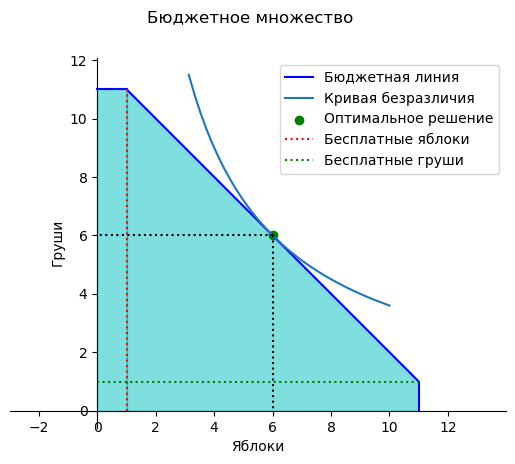

In [116]:

def budget_Cobb_Douglas_solution_free(g1, g2, budget, alpha=0.5):

    x_solution = alpha*(budget+g1.price*g1.free+g2.price*g2.free)/g1.price
    y_solution = ((1-alpha)*(budget+g1.price*g1.free+g2.price*g2.free))/(g2.price)
    #проверка выхода за границы
    if (x_solution> budget/g1.price + g1.free):
        x_solution =  budget/g1.price + g1.free
        y_solution = g2.free
    if (y_solution>budget/g2.price + g2.free):
        y_solution =  budget/g2.price + g2.free
        x_solution = g1.free
    
    return x_solution, y_solution,math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas_free(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution_free(g1, g2, budget, alpha)
    x_border = [0,g1.free]
    y_border = [(budget/g2.price) + g2.free, (budget/g2.price) + g2.free]
    x_points = [g1.free, (budget/g1.price) + g1.free] 
    y_points = [(budget/g2.price) + g2.free, g2.free]
    x_border_2 = [budget/g1.price + g1.free, budget/g1.price + g1.free]
    y_border_2 = [0, g2.free]
    fig, ax = plt.subplots()
    fig.suptitle("Бюджетное множество")
    
    
    ax.fill_between(x_border, y_border, np.zeros_like(x_points), alpha=0.5, color="c")
    ax.plot(x_border, y_border,color='b' )
    ax.plot(x_border_2, y_border_2,color='b' )
    
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5,color = "c" )
    ax.plot(x_points, y_points, label="Бюджетная линия", color = 'b')
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < (budget+g1.price*g1.free + g2.price*g2.free)/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.plot([g1.free,g1.free],[(budget/g2.price) + g2.free, 0],'r:', label = "Бесплатные яблоки")
    ax.plot([0,(budget/g1.price) + g1.free],[g2.free, g2.free],'g:', label = "Бесплатные груши")
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Goodfree("Яблоки", 10, 1)
g2 = Goodfree("Груши", 10, 1)
budget = 100
alpha = 0.5
plot_budget_Cobb_Douglas_free(g1, g2, budget, alpha)

In [117]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Goodfree("Яблоки", p1, f1)
    g2 = Goodfree("Груши", p2, f2)
    plot_budget_Cobb_Douglas_free(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [118]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name,threshold, price1, price2):
        self.name = name
        self.threshold = threshold
        self.price1 = price1
        self.price2 = price2 
    def price(self,quantity):
        if quantity > self.threshold:
            return self.threshold * self.price1 + (quantity - self.threshold) * self.price2
        elif quantity == self.threshold:
            return self.threshold * self.price1
        elif quantity < self.threshold:
            return quantity*self.price1
    def quantity(self, budget):
        return self.threshold + (budget- self.threshold*self.price1)/self.price2
g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
#примеры работы функций
print(g1.price(6)) # 5 яблок по цене 10, одно- за 3 => 5*10+3 = 53
print(g1.quantity(budget)) 
print(g2.price(10))#3 груши по цене 8 , 7 - за 3 => 3*8 +7*3 = 45
print(g2.quantity(budget)) 

53
17.0
45
23.666666666666668


## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [119]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    price_first = g1.price(x1)
    price_second = g2.price(x2)
    result = price_first + price_second
    if (is_equal(result, budget)):
        return 0
    elif (result < budget):
        return 1
    else:
        return -1



g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

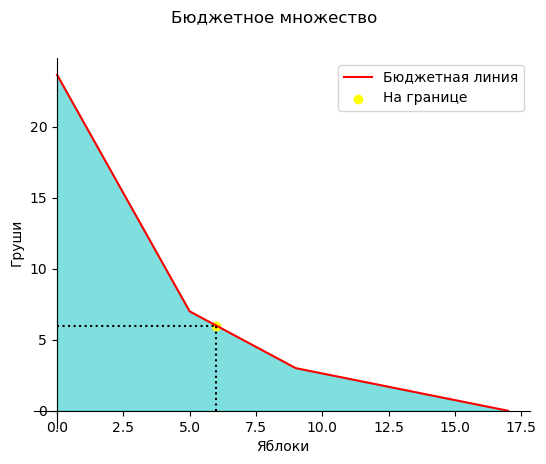

In [122]:
def plot_budget(g1: Good, g2: Good, budget, x, y):
    if g1.threshold>g1.quantity(budget):
        x_val = [0, max(g1.quantity(budget-g2.threshold), 0), max(g1.quantity(budget),0)]
        y_val = [max(g2.quantity(budget),0),max(g2.threshold, 0), 0]
    elif g2.threshold > g2.quantity(budget):
        x_val = [0, max(0, g1.threshold), max(g1.quantity(budget),0)]
        y_val = [max(g2.quantity(budget),0), max(g2.quantity(budget - g1.price(g1.threshold)), 0), 0]
    elif g1.threshold>g1.quantity(budget) and g2.threshold > g2.quantity(budget):
        x_val = [0, max(g1.quantity(budget))]
        y_val = [max(g2.quantity(budget),0),0]
    elif(g1.threshold< g1.quantity(budget - g2.price(g2.threshold))):
        x_val = [0, max(0,g1.threshold), max(0,g1.quantity(budget-g2.price1*g2.threshold)), max(0,g1.quantity(budget))]
        y_val = [max(g2.quantity(budget),0), max(0,g2.quantity(budget- g1.price1*g1.threshold)),max(g2.threshold,0), 0]
    else:
        x_val = [0, max(0,g1.quantity(budget-g2.price1*g2.threshold)), max(0,g1.threshold), max(0,g1.quantity(budget))]
        y_val = [max(g2.quantity(budget),0), max(g2.threshold,0), max(0,g2.quantity(budget- g1.price1*g1.threshold)), 0]
    
    fig, ax = plt.subplots()
    fig.suptitle("Бюджетное множество")
    ax.plot(x_val, y_val, label="Бюджетная линия", color = 'r')
       
    ax.fill_between(x_val, y_val, np.zeros_like(x_val), alpha=0.5, color = 'c') 

    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки
    
 # В зависимости от статуса определяем цвет точки и надпись
 # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') 
    ax.plot([0, x], [y,y], 'k:') 
    
    
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)


    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.legend() 
    plt.show() 

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
plot_budget(g1, g2, budget, 6, 6)

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

In [123]:
# Интерактивный виджет
def interactive_plot(threshold1, threshold2, p11, p12, p21, p22, budget, x,y ):
    g1 = Good("Яблоки", threshold1, p11, p12) # Создаем первый товар с ценой p1
    g2 = Good("Груши", threshold2, p21, p22) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, threshold1 =(1, 5), threshold2 = (1,5), p11=(1, 10), p12 = (1, 10), p21 = (1,10), p22 = (1,10), budget=(1,100), x = (1,10), y=(1,10));

interactive(children=(IntSlider(value=3, description='threshold1', max=5, min=1), IntSlider(value=3, descripti…

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

Бюджетное ограничение в данной модели задается уравнением:  
$g1.treshold \dot g1.price1 + (x_{1}-g1.treshold) \dot g1.price2 + g2.treshold \dot g2.price1 + (x_{2}-g2.threshold) \dot g2.price2$  
Для заданных точек можно подобрать параметры в данной модели, если их можно соединить кривой, где отрезки попарного соединения точек имеют отрицательный коэффициент k (в уравнении прямой вида $y= kx+b$). k=0 не подходит, так как тогда получается цены равны 0. Иными словами, функция должна строго убывать. Для проверки данного условия существует функция is_possible.  
Далее для построения параметров положим, что сначала наступает перелом, отвечающий за g1.threshold (то есть $g1.threshold < g1.quantity(budget- g2.price1 * g2.threshold$, а $g2.threshold<g2.quantity(budget- g1.price1 * g1.threshold $)  
Далее будем решать СЛУ, чтобы найти цены товаров: 
  
$\begin{pmatrix}
x_{0} & max(x_{0}-threshold1,0) & threshold2 & max(y_{0} - threshold2,0)\\
threshold1 &  max(x_{1}-threshold1,0) & threshold2 & max(y_{1} - threshold2,0)\\
threshold1 & max(x_{2}-threshold1,0) & threshold2 & max(y_{2} - threshold2,0) \\
threshold1 & max(x_{3}-threshold1,0)& y_{3}& max(threshold{3}-threshold2,0)
\end{pmatrix}
\begin{pmatrix}
        p_{11} \\
        p_{12} \\
        p_{21}\\
        p_{22}
\end{pmatrix}
= 
\begin{pmatrix}
        budget \\
        budget \\
        budget\\
        budget
\end{pmatrix}$


In [124]:
def linear_func(x1, y1, x2, y2):
    if(x1-x2 == 0):
        k = -10000
        b = 0;
        return k,b
    elif(y1-y2==0):
        k = 0
        b = y1
        return k, b
    else:
        k = (y1-y2)/(x1-x2)
        b = y1 - k*x1
        return k,b
    
def find_prices2(list_of_freepoints: np.array, budget = 1):
    ones = np.full(len(list_of_freepoints),budget)
    if np.linalg.det(list_of_freepoints) != 0:
        solution = np.linalg.inv(list_of_freepoints) @ ones
    else:
        return None
    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

gugu
Возможные параметры:
threshold1 = 4
threshold2 = 5
prices11: 3.3333333333333286
prices12: 3.3333333333333304
prices21: 6.666666666666671
prices22: 1.6666666666666679


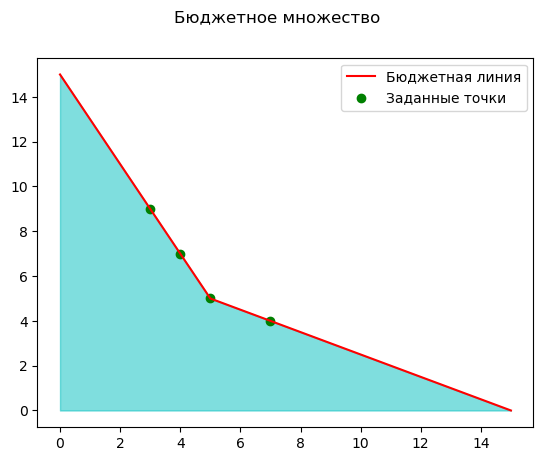

In [125]:
def filtered_list(list_of_points): #функция для выявления одинаковых точек 
    filtered = [] 
    for i in range(len(list_of_points)):
        if (list_of_points[i] in filtered):
            continue;
        else:
            for j in range(len(list_of_points)):
                if(list_of_points[i][0]==list_of_points[j][0] and list_of_points[i][1]== list_of_points[j][1] and list_of_points[i] not in filtered):
                    filtered.append(list_of_points[i])
    return filtered

def is_possible(list_of_points): #функция, которая определяет возможно ли подобрать такие параметры
    list_of_points.sort()
    possible= True
    for i in range(len(list_of_points)):
        if(i!= len(list_of_points)-1):
            if(list_of_points[i][1] < list_of_points[i+1][1]):
                possible=False
                break
            elif (list_of_points[i][1]  == list_of_points[i+1][1] and list_of_points[i][0]  != list_of_points[i+1][0]):
                possible = False
    return possible    
    
    
def grafik(list_of_points):
        list_of_points.sort() #сортирую для удобства доступа к нужным точкам ()
        if(len(list_of_points) ==1): #случай, когда все 4 точки одинаковые. Возможно подобрать бесконечное количество параметров, приведу произвольное построение
            fig, ax = plt.subplots()
            k1,b1 = linear_func(list_of_points[0][0], list_of_points[0][1], 0, list_of_points[0][1]+5 )
            y_oy = b1
            x_oy = 0
            x_ox = (-b1)//k1
            y_ox = 0
            x=[x_oy,list_of_points[0][0],x_ox]
            y = [y_oy,list_of_points[0][1],y_ox]
            fig.suptitle("Бюджетное множество")
            ax.plot(x, y, label="Бюджетная линия", color = 'r')
            ax.fill_between(x, y, np.zeros_like(x), alpha=0.5, color = 'c')
            points_x = [list_of_points[0][0]]
            points_y = [list_of_points[0][1]]
            ax.scatter(points_x, points_y, label="Заданные точки", color="green")
            ax.legend()
            #Пусть threshold1 = 0
            #threshold2 = 0
            #g1.price1 = g1.price2
            #g2.price1 = g2.price2
            #Без ограничения общности budget = 50
            #Запишем СЛУ, состоящую из двух уравнений вида g1.price2*x1 + g2.price2*x2 = m
            budget = 50
            A = [
            [x_oy,y_oy],
            [list_of_points[0][0],list_of_points[0][1]],
             ]
            
            price1, price2 = find_prices2(A,budget)
            
            print("Возможные параметры:")
            print("threshold1 =", 0)
            print("threshold2 =", 0)
            print("g1.price1 = g1.price2 = ", price1)
            print("g2.price1 = g2.price2  =", price2)
        elif (len(list_of_points) ==2): #две пары точек из 4 совпадают 
            fig, ax = plt.subplots()
            k1,b1 = linear_func(list_of_points[0][0], list_of_points[0][1], list_of_points[1][0], list_of_points[1][1])
            y_oy = b1
            x_oy = 0
            x_ox = (-b1)//k1
            y_ox = 0
            x=[x_oy,list_of_points[0][0],list_of_points[1][0],x_ox]
            y = [y_oy,list_of_points[0][1],list_of_points[1][1],y_ox]
            points_x = [list_of_points[0][0],list_of_points[1][0]]
            points_y = [list_of_points[0][1], list_of_points[1][1]]
            fig.suptitle("Бюджетное множество")
            ax.plot(x, y, label="Бюджетная линия", color = 'r')
            ax.fill_between(x, y, np.zeros_like(x), alpha=0.5, color = 'c')
            ax.scatter(points_x,points_y, label="Заданные точки", color="green")
            ax.legend()
            #Пусть threshold1 = минимальная абсцисса из всех точек 
            #threshold2 = ордината точки с максимальной координатой по оси абсцисс
            #Без ограничения общности budget = 50
            #Дополню до 4 точек с помощью точек пересечения бюджетного ограничения с осями Ox и Oy
            #Запишем СЛУ, состоящую из 4 уравнений вида g1.price1*threshold1+ g1.price2*(x1 - threhold1)+ g2.price1*threshold2+g2.price2*(x2-threshold2) = m
            threshold1= list_of_points[0][0]
            threshold2 = list_of_points[1][1]
            budget = 50
            A = [
            [0, 0,threshold2,max(y_oy - threshold2,0)],
            [threshold1, max(list_of_points[0][0]-threshold1,0),threshold2, max(list_of_points[0][1] - threshold2,0)],
            [threshold1, max(list_of_points[1][0]-threshold1,0),threshold2,max(list_of_points[1][1] - threshold2,0)],
            [threshold1, max(x_ox-threshold1,0), 0, 0],
             ]
            solution = find_prices2(A, budget)
            print("Возможные параметры:")
            print("threshold1 =", threshold1)
            print("threshold2 =", threshold2)
            print("prices11:", solution[0])
            print("prices12:", solution[1])
            print("prices21:", solution[2])
            print("prices22:", solution[3])
        elif(len(list_of_points)==3): #пара точек совпадает 
            fig, ax = plt.subplots()
            k1,b1 = linear_func(list_of_points[0][0], list_of_points[0][1], list_of_points[1][0], list_of_points[1][1])
            k2,b2 = linear_func(list_of_points[1][0], list_of_points[1][1], list_of_points[2][0], list_of_points[2][1])
            y_oy = b1
            x_oy = 0
            x_ox = (-b2)//k2
            y_ox = 0
            x = [x_oy,list_of_points[0][0], list_of_points[1][0], list_of_points[2][0],x_ox]
            y = [y_oy,list_of_points[0][1], list_of_points[1][1], list_of_points[2][1],y_ox]
            points_x = [list_of_points[0][0], list_of_points[1][0], list_of_points[2][0]]
            points_y = [list_of_points[0][1], list_of_points[1][1], list_of_points[2][1]]
            fig.suptitle("Бюджетное множество")
            ax.plot(x, y, label="Бюджетная линия", color = 'r')
            ax.fill_between(x, y, np.zeros_like(x), alpha=0.5, color = 'c')
            ax.scatter(points_x, points_y, label="Заданные точки", color="green")
            ax.legend()
            #Пусть threshold1 = минимальная абсцисса из всех точек 
            #threshold2 = ордината точки с максимальной координатой по оси абсцисс
            #Без ограничения общности budget = 50
            #Дополню до 4 точек с помощью точек пересечения бюджетного ограничения с осью Oy
            #Запишем СЛУ, состоящих из 4 уравнений вида g1.price1*threshold1+ g1.price2*(x1 - threhold1)+ g2.price1*threshold2+g2.price2*(x2-threshold2) = m
            threshold1= list_of_points[0][0]
            threshold2 = list_of_points[1][1]
            budget = 50
            A = [
            [0, 0 ,threshold2,max(y_oy-threshold2,0)],
            [threshold1, max(list_of_points[0][0]-threshold1,0),threshold2, max(list_of_points[0][1] - threshold2,0)],
            [threshold1, max(list_of_points[1][0]-threshold1,0),threshold2,max(list_of_points[1][1] - threshold2,0)],
            [threshold1, max(list_of_points[2][0]-threshold1,0), list_of_points[2][1], 0],
             ]
            solution = find_prices2(A, budget)
            print("Возможные параметры:")
            print("threshold1 =", threshold1)
            print("threshold2 =", threshold2)
            print("prices11:", solution[0])
            print("prices12:", solution[1])
            print("prices21:", solution[2])
            print("prices22:", solution[3])
            
        else: #все точки различны
            print("gugu")
            fig, ax = plt.subplots()
            k1,b1 = linear_func(list_of_points[0][0], list_of_points[0][1], list_of_points[1][0], list_of_points[1][1])
            k2,b2 = linear_func(list_of_points[1][0], list_of_points[1][1], list_of_points[2][0], list_of_points[2][1])
            k3,b3 = linear_func(list_of_points[2][0], list_of_points[2][1], list_of_points[3][0], list_of_points[3][1])
            y_oy = b1
            x_oy = 0
            x_ox = (-b3)//k3
            y_ox = 0
            x = [x_oy,list_of_points[0][0], list_of_points[1][0], list_of_points[2][0], list_of_points[3][0],x_ox]
            y = [y_oy,list_of_points[0][1], list_of_points[1][1], list_of_points[2][1], list_of_points[3][1],y_ox]
            points_x = [list_of_points[0][0], list_of_points[1][0], list_of_points[2][0], list_of_points[3][0]]
            points_y = [list_of_points[0][1], list_of_points[1][1], list_of_points[2][1], list_of_points[3][1]]
            fig.suptitle("Бюджетное множество")
            ax.plot(x, y, label="Бюджетная линия", color = 'r')
            ax.fill_between(x, y, np.zeros_like(x), alpha=0.5, color = 'c')
            ax.scatter(points_x, points_y, label="Заданные точки", color="green")
            ax.legend()
            #Пусть threshold1 = минимальная абсцисса из всех точек 
            #threshold2 = ордината точки с максимальной координатой по оси абсцисс
            #Без ограничения общности budget = 50
            #Запишем СЛУ, состоящих из 4 уравнений вида g1.price1*threshold1+ g1.price2*(x1 - threhold1)+ g2.price1*threshold2+g2.price2*(x2-threshold2) = m
            threshold1= list_of_points[1][0]
            threshold2 = list_of_points[2][1]
            budget = 50
            A = [
            [list_of_points[0][0], max(list_of_points[0][0]-threshold1,0),threshold2,max(list_of_points[0][1] - threshold2,0)],
            [threshold1, max(list_of_points[1][0]-threshold1,0),threshold2, max(list_of_points[1][1] - threshold2,0)],
            [threshold1, max(list_of_points[2][0]-threshold1,0),threshold2,max(list_of_points[2][1] - threshold2,0)],
            [threshold1, max(list_of_points[3][0]-threshold1,0), list_of_points[3][1], max(list_of_points[3][1]-threshold2,0)],
             ]
            solution = find_prices2(A, budget)
            print("Возможные параметры:")
            print("threshold1 =", threshold1)
            print("threshold2 =", threshold2)
            print("prices11:", solution[0])
            print("prices12:", solution[1])
            print("prices21:", solution[2])
            print("prices22:", solution[3])
        
A1 = [5,5]
A2 = [7,4]
A3 = [4,7]
A4= [3,9]
list_points = [A1,A2,A3,A4]
a = filtered_list(list_points)
if is_possible(a):
    grafik(a)
else:
    print("невозможно подобрать параметры")

In [126]:
def interactive_plot(x1, y1, x2, y2, x3, y3, x4, y4):
    list_of_points = [
        [x1, y1],
        [x2, y2],
        [x3, y3],
        [x4, y4],
    ]
    list_points = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
    a = filtered_list(list_points)
    if is_possible(a):
        grafik(a)
    else:
        print("невозможно")

interact(interactive_plot, x1=(1, 10), y1 = (1, 10), x2=(1, 10), y2 = (1, 10), x3 = (1,10), y3 = (1,10), x4 = (1,10), y4 = (1,10));

interactive(children=(IntSlider(value=5, description='x1', max=10, min=1), IntSlider(value=5, description='y1'…

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

Для того чтобы найти оптимальное решение рассмотрим наше бюджетное ограничение на нескольких промежутках так, чтобы было возможно рассмотреть модель в качестве модели с бесплатным количеством каждого блага.
Для этого поделю график на три блока: 1)нет бесплатного блага 1; 2) есть бесплатные и 1, и 2 ,блага; 3) нет бесплатного блага 2;
Для каждого из этих случаев найдем оптимум,который лежит на наклонной части нового графика (полученные результаты запишем в массив $solution_{i}$ и потом выберем ту точку, где полезность максимальная - это и будет оптимум). Однако таких точек может быть нескольно. В этом и заключается отличие модели 3 от 1 и 2: одинаковая полезность может быть в разных точках, следовательно и оптимумов несколько. 

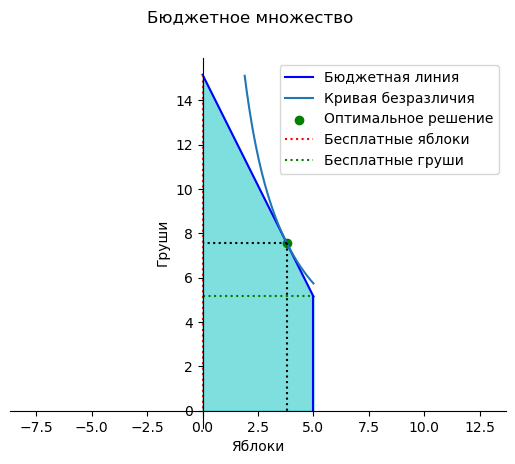

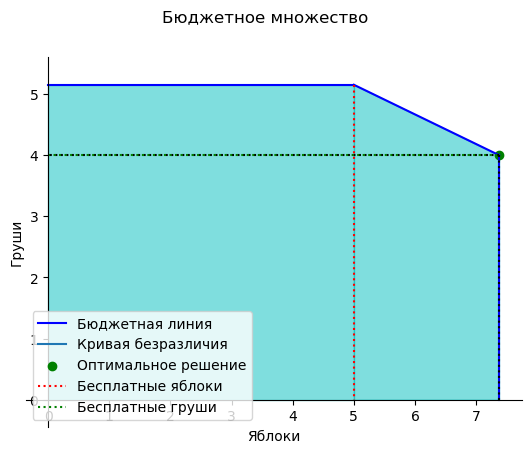

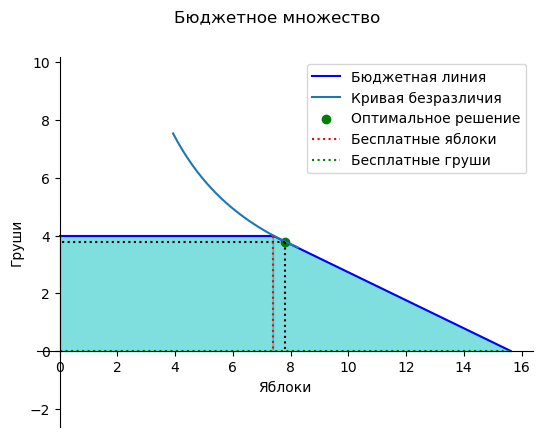

[5.356869554443542, 5.431390245600107, 5.439926748615557]


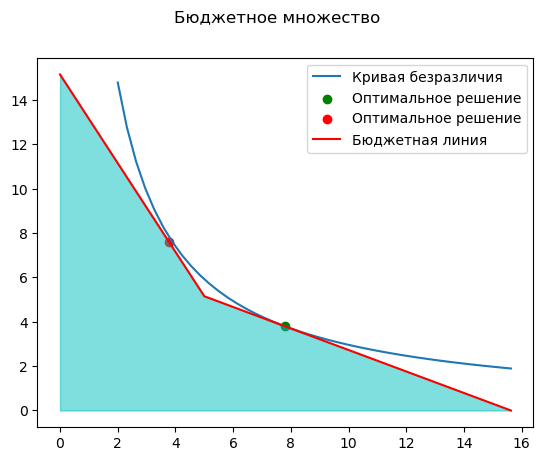

In [130]:
def plot_budget_Cobb_Douglas2(g1, g2, budget, alpha=0.5):
    x_val = [0, max(0,g1.threshold), max(0,g1.quantity(budget-g2.price1*g2.threshold)), max(0,g1.quantity(budget))]
    x_val.sort()
    y_val = [max(g2.quantity(budget),0), max(0,g2.quantity(budget- g1.price1*g1.threshold)),max(g2.threshold,0), 0]
    y_val.sort(reverse=True)
    #1 блок
    if(x_val[1]== g1.threshold and y_val[2] == g2.threshold):
        A1= [
            [0, g2.quantity(budget) - y_val[1]],
            [x_val[1], y_val[1]- y_val[1]]
            
        ]
        free11 = 0
        free12= y_val[1]
        b= [budget, budget]
        price11, price12 = np.linalg.inv(A1) @ b
        g11 = Goodfree("Яблоки",price11, free11)
        g12 = Goodfree("Груши",price12, free12)
        solution1 = (budget_Cobb_Douglas_solution_free(g11,g12, budget,alpha))
        if(solution1[0] == x_val[1] and solution1[1]<y_val[1]): #если оптимум лежит на вертикальной прямой, которой в итоге нет в финальном графике
            #сделаем так, чтобы полезность на этом участке не учитывалась
            solution1= [x_val[1],y_val[1],0] #беру значение полезности как 0, так как оно заведомо не будет максимальной из всех
        
        plot_budget_Cobb_Douglas_free(g11, g12, budget)
    
     #2 блок

        free21 = g1.threshold
        free22 = g2.threshold
        A2= [
            [x_val[1]-free21, y_val[1]-free22],
            [x_val[2]-free21, y_val[2]-free22],
        ]
        price21, price22 = np.linalg.inv(A2) @ b
        g21 = Goodfree("Яблоки",price21, free21)
        g22 = Goodfree("Груши",price22,free22)
        solution2 = (budget_Cobb_Douglas_solution_free(g21,g22, budget,alpha))
        if((solution2[0] == x_val[2] and solution2[1]<y_val[2]) or (solution2[0] < x_val[1] and solution2[1]==y_val[1])) :
           #если оптимум лежит на вертикальной или горизонтальной прямой, которых в итоге нет в финальном графике
           #сделаем так, чтобы полезность на этом участке не учитывалась
            solution2= [x_val[1],y_val[1],0] #беру значение полезности как 0, так как оно заведомо не будет максимальной из всех
        
        plot_budget_Cobb_Douglas_free(g21, g22, budget)
    #3 блок 
        

        free31 = x_val[2]
        free32 = 0
        A3= [
            [g1.quantity(budget)-free31, 0 - free32],
            [x_val[2]-free31, y_val[2]- free32]
            
        ]
        b= [budget, budget]
        price31, price32 = np.linalg.inv(A3) @ b
    
        g31 = Goodfree("Яблоки",price31, free31)
        g32 = Goodfree("Груши",price32,free32)
        solution3 = budget_Cobb_Douglas_solution_free(g31,g32, budget, alpha)
        if (solution3[0] < x_val[2] and solution3[1]==y_val[2]) :
           #если оптимум лежит на вертикальной или горизонтальной прямой, которых в итоге нет в финальном графике
           #сделаем так, чтобы полезность на этом участке не учитывалась
            solution3= [x_val[2],y_val[2],0] #беру значение полезности как 0, так как оно заведомо не будет максимальной из всех
        
        plot_budget_Cobb_Douglas_free(g31,g32,budget, alpha)
        
    elif(y_val[1] == g2.threshold and x_val[2] == g1.threshold):#если сначала перелом с threshold по 2 благу
        A1= [
            [0, g2.quantity(budget) - y_val[1]],
            [x_val[1], y_val[1]- y_val[1]]
            
        ]
        free11 = 0
        free12= y_val[1]
        b= [budget, budget]
        price11, price12 = np.linalg.inv(A1) @ b
        g11 = Goodfree("Яблоки",price11, free11)
        g12 = Goodfree("Груши",price12, free12)
        solution1 = (budget_Cobb_Douglas_solution_free(g11,g12, budget, alpha))
        if(solution1[0] == x_val[1] and solution1[1]<y_val[1]): #если оптимум лежит на вертикальной прямой, которой в итоге нет в финальном графике
            #сделаем так, чтобы полезность на этом участке не учитывалась
            solution1= [x_val[1],y_val[1],0] #беру значение полезности как 0, так как оно заведомо не будет максимальной из всех
        
        plot_budget_Cobb_Douglas_free(g11,g12,budget, alpha)
     #2 блок

        free21 = g1.quantity(budget-g2.price(g2.threshold))
        free22 = g2.quantity(budget-g1.price(g1.threshold))
        A2= [
            [x_val[1]-free21, y_val[1]-free22],
            [x_val[2]-free21, y_val[2]-free22],
        ]
        price21, price22 = np.linalg.inv(A2) @ b
        g21 = Goodfree("Яблоки",price21, free21)
        g22 = Goodfree("Груши",price22,free22)
        solution2 = (budget_Cobb_Douglas_solution_free(g21,g22, budget,alpha))
        if((solution2[0] == x_val[2] and solution2[1]<y_val[2]) or (solution2[0] < x_val[1] and solution2[1]==y_val[1])) :
           #если оптимум лежит на вертикальной или горизонтальной прямой, которых в итоге нет в финальном графике
           #сделаем так, чтобы полезность на этом участке не учитывалась
            solution2= [x_val[1],y_val[1],0] #беру значение полезности как 0, так как оно заведомо не будет максимальной из всех
        
        plot_budget_Cobb_Douglas_free(g21,g22,budget, alpha)
    #3 блок 

        free31 = x_val[2]
        free32 = 0
        A3= [
            [g1.quantity(budget)-free31, 0 - free32],
            [x_val[2]-free31, y_val[2]- free32]
            
        ]
        b= [budget, budget]
        price31, price32 = np.linalg.inv(A3) @ b
    
        g31 = Goodfree("Яблоки",price31, free31)
        g32 = Goodfree("Груши",price32,free32)
        solution3 = budget_Cobb_Douglas_solution_free(g31,g32, budget, alpha)
        if (solution3[0] < x_val[2] and solution3[1]==y_val[2]) :
           #если оптимум лежит на вертикальной или горизонтальной прямой, которых в итоге нет в финальном графике
           #сделаем так, чтобы полезность на этом участке не учитывалась
            solution3= [x_val[2],y_val[2],0] #беру значение полезности как 0, так как оно заведомо не будет максимальной из всех
        plot_budget_Cobb_Douglas_free(g31,g32,budget, alpha)

    solutions = [solution1, solution2, solution3]
    utilities = [solution1[2], solution2[2], solution3[2]]
    print(utilities)
    maximum = -1
    indm = []
    conc = []
    a = max(utilities) #запринтила для иллюстрации того, что там небольшая погрешность и в примере действительно два оптимума в 2 и 3 блоках
    for j in range(len(utilities)):
        if(is_equal(utilities[j], a)):
            indm.append(j)
    for j in range(len(indm)):
        conc.append(solutions[indm[j]])
    fig, ax = plt.subplots()
    x_values = np.linspace(0.1, g1.quantity(budget))
    y_values = np.array([Cobb_Douglas(x, conc[0][2], alpha) for x in x_values])
    filter = y_values < g2.quantity(budget)
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    if(len(conc)==2):
         ax.scatter([conc[0][0],conc[1][0]], [conc[0][1], conc[1][1]],label="Оптимальное решение", color='green')
    elif(len(conc)==1):
         ax.scatter([conc[0][0]], [conc[0][1]],label="Оптимальное решение", color='green')
    #искусственно добавлю точку для наглядности, далее в интерактивном виджете прошу ее не учитывать
    ax.scatter([solution1[0]], [solution1[1]],label="Оптимальное решение", color='red')
    x_val = [0, max(0,g1.threshold), max(0,g1.quantity(budget-g2.price1*g2.threshold)), max(0,g1.quantity(budget))]
    x_val.sort()
    y_val = [max(g2.quantity(budget),0), max(0,g2.quantity(budget- g1.price1*g1.threshold)),max(g2.threshold,0), 0]
    y_val.sort(reverse=True)
    fig.suptitle("Бюджетное множество")
    ax.plot(x_val, y_val, label="Бюджетная линия", color = 'r')
       
    ax.fill_between(x_val, y_val, np.zeros_like(x_val), alpha=0.5, color = 'c') # Заливаем область под графиком с прозрачностью (alpha) 0.5
    ax.legend()
#пример с двумя оптимумами ( из-за погрешности на графике вторая точка не )
g2 = Good("Яблоки",4 , 3.3, 3.3)
g1 = Good("Груши", 5, 6.6, 1.6)
budget = 50
alpha = 0.5
plot_budget_Cobb_Douglas2(g1, g2, budget, alpha)

In [131]:
def interactive_plot(threshold1, threshold2, p11, p12, p21, p22, budget, alpha):
    g1 = Good("Яблоки", threshold1, p11, p12) 
    g2 = Good("Груши", threshold2, p21, p22)
    plot_budget_Cobb_Douglas2(g1, g2, budget, alpha);
    
interact(interactive_plot, threshold1 =(1, 5), threshold2 = (1,5), p11=(1, 10), p12 = (1, 10), p21 = (1,10), p22 = (1,10), budget=(1,100), x = (1,10), y=(1,10), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=3, description='threshold1', max=5, min=1), IntSlider(value=3, descripti…